# PROGRAMMING FOR DATA ANALYSIS PROJECT



### OBJECTIVES

1 Source a dataset which has at least 100 data points across 4 variables.
2 Investigate the variables, their likely distributions and their relationships
    with each other.
3 Simulate a data set as closely matching the properties of the real world
    data set as possible.


#### Sources

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 
http://www3.dsi.uminho.pt/pcortez/student.pdf
 These two sources were very useful.  I found my dataset in the first source and used the second to find out how the Cortez & Silva
study related to predicting success in education by examining variables in the students' lives.

http://uis.unesco.org/country/PT
    Provides data of population of Portugal broken down by age.
    
https://www.oecd-ilibrary.org/docserver/9789264117020-4-en.pdf
    Provided me with information about Portugese school system.
   
https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
    This source helped me to tidy up the dataset into the columns and rows I wanted to keep.

https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/
    This source helped me to find a way to display all the data in the dataset.
    
https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/
    This source was very useful with appropriate functions to interpret the data.

https://seaborn.pydata.org/
    This source helped me to use correct syntax to plot my data.  It was also excellent to help me choose which plots to use.
    
https://www.bing.com/videos/search?q=normal+distribution+python
    A useful video to help me code a normal distribution plot.
    
https://stackoverflow.com/questions/16312006/python-numpy-random-normal-only-positive-values
    All my values are positive so a normal distribution will not show my data.  This site 
    suggested I try a binomial distribution.  A binomial distribution is a discrete distribution
    which only represents yes/no or true/false options so this will not do.
    
https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/
https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
    These sites helped me with data snippets I could manipulate to create plots to display 
    my dataset.
    
https://stackoverflow.com/questions/10138085/python-plot-normal-distribution 
http://www.johndcook.com/distributions_scipy.html 
http://docs.scipy.org/doc/scipy/reference/stats.html 
http://telliott99.blogspot.com/2010/02/plotting-normal-distribution-with.html
The stackoverflow site offered some code to help me create a way to plot a normal distribution using my data mean and standard deviation. 
The other three urls are the sources of the code which I modified to plot my data. I had to abandon this method of illustration as it gave me negative values.

https://www.youtube.com/watch?v=zQy0lEfXsVI 
Noureddin Sadawi runs this Youtube site on Pandas Dataframes, it helped me to construct my histograms.

https://seaborn.pydata.org/tutorial/relational.html 
I used this site to plan my other plots to correlate data.
        





### FINDING A DATASET - Objective 1

Silva and Cortez studied students in two subjects, Portugese and Maths.  I selected the csv for Maths because I thought 
it would be more relatable for me to choose a universal school subject.
I predict there is a link between the variables; school attendance, mother's education, father's education, plans to attend 
higher education and achievement.  I will use the dataset produced by Cortez and Silva which includes these variables among others.
First I will import the dataset and eliminate the other variables until I have the ones I want to investigate.  

In [1]:
# Import library and dataset.
import pandas as pd

# The dataset was in a zipped file so I had to unzip it, save it to my local machine and then read the filename into
# Jupyter.  The file was not saved using commas as delimiters so I added the parameter delimiter = ; so Pandas could
# organise the information into a separated file of rows and columns.  The folder is saved as student with the other files
# relating to this project.  This original folder has four files from which I have chosen the file to do with 
# achievement in maths.

dfgrade = pd.read_csv("student/student-mat.csv", delimiter=";")

# Check the types of data; object, int etc.
dfgrade.dtypes

# Show the full dataframe, I have commented this as it is very big.
#print(dfgrade)


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [2]:
import pandas as pd
dfgrade = pd.read_csv("student/student-mat.csv", delimiter=";")


# Use the drop function to take all the columns out which I will not be using.
dfgrade = dfgrade.drop(["school", "sex", "age", "address","famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "traveltime", 
             "studytime", "failures", "schoolsup", "famsup", "paid", "activities", "nursery", "internet", 
              "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health"], axis=1)
#print(dfgrade)

# Having looked at all the data there is a large number of students who got
# 0 as their final grade (G3).  I am going to take this group out of the cohort
# because they are skewing the statistics.  I assume for one reason or another they
# did not take the final exam.  I found this out further down and came back to this cell.

dfgrade = dfgrade.drop([128, 130, 131, 134, 135, 136, 136, 137, 140, 144, 146, 148,
           150, 153, 160, 162, 168, 170, 173, 221, 239, 242, 244,
       259, 264, 269, 296, 310, 316, 332, 333, 334, 337, 341, 367, 387, 389])

# Show the new dataframe, it now has 359 rows and 7 columns, excluding the index column.
print(dfgrade)


     Medu  Fedu higher  absences  G1  G2  G3
0       4     4    yes         6   5   6   6
1       1     1    yes         4   5   5   6
2       1     1    yes        10   7   8  10
3       4     2    yes         2  15  14  15
4       3     3    yes         4   6  10  10
..    ...   ...    ...       ...  ..  ..  ..
390     2     2    yes        11   9   9   9
391     3     1    yes         3  14  16  16
392     1     1    yes         3  10   8   7
393     3     2    yes         0  11  12  10
394     1     1    yes         5   8   9   9

[359 rows x 7 columns]





### INVESTIGATION OF DATA SET - Objective 2

In [3]:
# Information about the dataframe, the variables and their datatype.
dfgrade.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 394
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Medu      359 non-null    int64 
 1   Fedu      359 non-null    int64 
 2   higher    359 non-null    object
 3   absences  359 non-null    int64 
 4   G1        359 non-null    int64 
 5   G2        359 non-null    int64 
 6   G3        359 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 22.4+ KB


In [4]:
# Statistical information about the variables showing the mean, standard deviation,
# quartile values, maximum and minimum values.
dfgrade.describe()


,Medu,Fedu,absences,G1,G2,G3
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.00000
mean,2.788301,2.540390,6.281337,11.247911,11.331476,11.45961
std,1.095841,1.084637,8.178283,3.245511,3.161197,3.33140
min,0.000000,0.000000,0.000000,3.000000,5.000000,0.00000
25%,2.000000,2.000000,2.000000,9.000000,9.000000,9.00000
50%,3.000000,3.000000,4.000000,11.000000,11.000000,11.00000
75%,4.000000,3.000000,8.000000,14.000000,13.500000,14.00000
max,4.000000,4.000000,75.000000,19.000000,19.000000,20.00000


In [5]:
# To examine one data point use the iloc method to locate the piece of data
# in the first position on the first row.
dfgrade.iloc[0:1,0:1]


,Medu
0,4


In [6]:
# To examine the data of one student at index 353
# This student has 2 parents who left school on or before age 9, he/she hopes
# to go to higher education, he/she has had 4 absences in the year and he/she
# has scored 8 out of 20 in the three tests that year, a failing grade.

dfgrade.set_index("Medu")
dfgrade.loc[(353)]


Medu          1
Fedu          1
higher      yes
absences      4
G1            8
G2            8
G3            8
Name: 353, dtype: object

In [7]:
# Identify the name of each column.

print(dfgrade.columns)


Index(['Medu', 'Fedu', 'higher', 'absences', 'G1', 'G2', 'G3'], dtype='object')




#### COMPARING G3 TO MOTHERS' EDUCATION

In [8]:
# Use pandas to cross tabulate the final year grade G3 with mother's education. This data shows us that
# only 3 students over the pass grade of 8 had mothers who had no education.  At the other end of the scale students
# who scored poorly (below 8) 18 of their mothers had a third level education.  The remaining students (107) of mothers 
# who had 3rd level education scored above 8.  The highest number of students still in school at secondary level are from
# families where their mothers have achieved a 3rd level education(125).

pd.crosstab(dfgrade["Medu"], dfgrade["G3"], margins = True)


G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
Medu,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,3
1,1,0,2,2,2,6,4,13,7,6,4,1,1,2,0,0,0,0,51
2,1,0,0,4,1,11,6,14,15,10,10,8,5,1,2,1,1,0,90
3,0,0,3,5,3,7,8,15,11,8,7,3,9,3,2,5,1,0,90
4,0,1,2,4,3,8,9,14,14,7,10,15,16,10,2,6,3,1,125
All,2,1,7,15,9,32,28,56,47,31,31,27,33,16,6,12,5,1,359


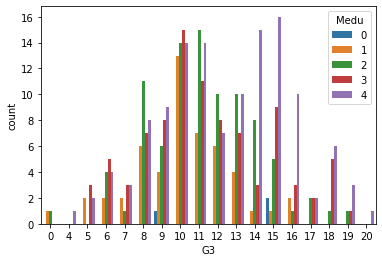

In [9]:
# Use seaborn to plot the data above to examine the relationship between mother's grade
# and child performance in school. A count plot can is a histogram across 
# a categorical, instead of quantitative, variable. 

import seaborn as sns

sns.countplot(x = "G3", hue="Medu", data = dfgrade);

# The plot clearly shows a high correlation between mother's education and the child's
# G3 school grade.  The purple bar represents mothers with 3rd level education and this
# bar is most highly correlated with children in the 14 - 20 grade scores.


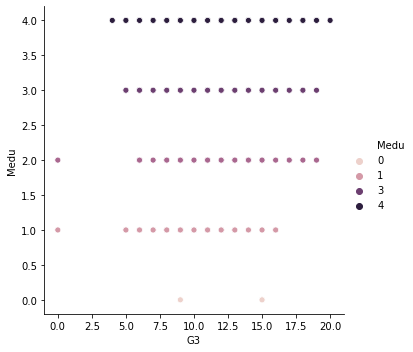

In [10]:
# Seaborn's relplot probably gives a clearer visualisation of the relationship between
# the student's final grade (G3) and his/her mother's education.  The different shades of purple
# relate to mother's education, and we can see more students with higher grades have mothers with higher education.
sns.relplot(x="G3", y = "Medu", hue = "Medu", data=dfgrade);

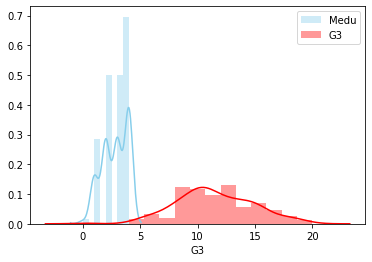

In [11]:
# Plotting two variables, mothers' education and G3 on the same Axis
import matplotlib.pyplot as plt
sns.distplot( dfgrade["Medu"] , color="skyblue", label="Medu")
sns.distplot( dfgrade["G3"] , color="red", label="G3")
plt.legend()
 
plt.show()

# This plot shows the correlation between mother's education and student grade.



#### COMPARING G3 TO FATHERS' EDUCATION

In [12]:
# Use pandas to cross tabulate the final year grade G3 with father's education. This data shows us that
# only 2 students over the pass grade of 8 had fathers who had no education.  At the other end of the scale students
# who scored poorly (below 8) 11 of their fathers had a third level education.  The remaining students (77) of fathers 
# in the 3rd level category scored above 8.  The highest number of students still in school at this stage are from
# families where their fathers have achieved a primary education. 

# It seems therefore that mother's education correlates more positively with children's achievement.

pd.crosstab(dfgrade["Fedu"], dfgrade["G3"], margins = True)


G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
Fedu,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2
1,1,0,1,5,5,8,5,16,6,8,5,4,3,3,0,2,0,0,72
2,1,0,3,4,1,8,9,14,17,8,9,8,12,4,0,2,3,0,103
3,0,1,1,3,1,12,9,18,11,7,8,4,8,4,2,4,0,1,94
4,0,0,2,3,2,4,5,7,13,8,9,11,10,4,4,4,2,0,88
All,2,1,7,15,9,32,28,56,47,31,31,27,33,16,6,12,5,1,359


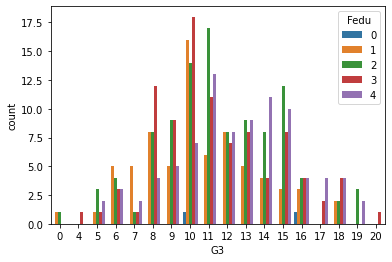

In [13]:
# Use seaborn to plot the data above to examine the relationship between father's grade
# and child performance in school.

sns.countplot(x = "G3", hue="Fedu", data = dfgrade);

# The plot shows a medium correlation between father's education and the child's
# G3 school grade.  The purple bar represents fathers with 3rd level education and this
# bar is correlated with children in the 14 - 20 grade score.


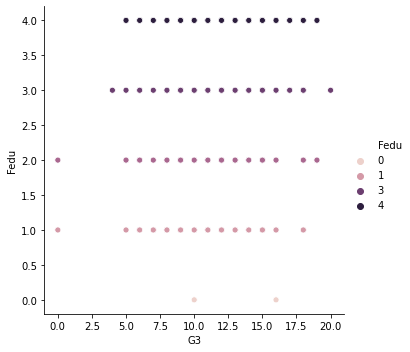

In [14]:
# Seaborn's relplot probably gives a clearer visualisation of the relationship between
# the student's final grade (G3) and his/her father's education.  The different shades of purple
# relate to father's education, and we can see students with higher grades have fathers with higher education.
# The correlation is not as close between Fedu and G3 as it was with Medu and G3.

sns.relplot(x="G3", y = "Fedu", hue = "Fedu", data=dfgrade);

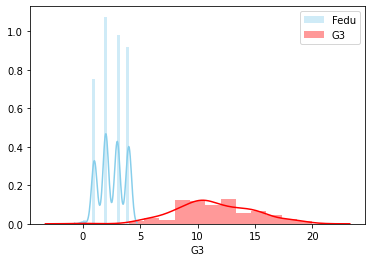

In [15]:
# Plotting fathers' education and G3 on the same Axis
sns.distplot( dfgrade["Fedu"] , color="skyblue", label="Fedu")
sns.distplot( dfgrade["G3"] , color="red", label="G3")
plt.legend()
 
plt.show()

# This plot shows the correlation between father's education and grade score.



#### COMPARING G3 AND ABSENCES

In [16]:
# Show the cross tabulation of the G3 score with the number of days
# the student was absent from school.

pd.crosstab(dfgrade["absences"], dfgrade["G3"], margins = True)


G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
absences,,,,,,,,,,,,,,,,,,,
0,2,0,0,1,1,6,4,12,6,10,4,6,15,4,3,3,2,0,79
1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,3
2,0,0,1,1,1,6,3,10,12,5,6,5,6,5,1,3,0,0,65
3,0,0,0,0,1,1,0,0,3,1,0,0,0,2,0,0,0,0,8
4,0,0,0,5,0,2,5,13,8,3,3,6,4,2,0,1,0,1,53
5,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,5
6,0,0,0,2,2,1,1,6,3,2,5,5,1,0,0,2,1,0,31
7,0,0,0,1,0,1,1,0,0,0,0,2,1,0,1,0,0,0,7
8,0,0,1,1,0,2,2,7,2,2,2,2,0,0,0,1,0,0,22


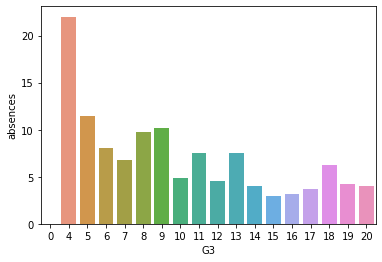

In [17]:
# Using seaborn barplot to demonstrate the correlation between the 
# number of absent days and the G3 grade the students scored.  The barchart
# shows clearly that students who missed 20+ days of school were
# mainly represented in the lower scores and students with 5 or fewer
# absence days are highly represented in the 14+ grade point scores. 

sns.barplot(x = "G3", y="absences", ci = None, data = dfgrade);


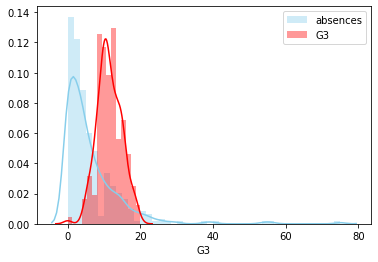

In [18]:
# Plotting absences and G3 on the same Axis
sns.distplot( dfgrade["absences"] , color="skyblue", label="absences")
sns.distplot( dfgrade["G3"] , color="red", label="G3")
plt.legend()
 
plt.show()

# This plot shows the high correlation between fewer absences and higher grade score.



#### COMPARING G3 TO 3RD LEVEL INTENTIONS

In [19]:
# Crosstabulating final grade, G3, with intention to go to 3rd Level.

# This data cannot be said to be useful in predicting grades
# for students in maths.  Because this is a secondary school most
# students attending would intend to study at third level.  It seems
# that in the Portugese educational system it is normal to leave
# at 15 if you are not planning 3rd level.  Therefore it is safe to
# assume that those who go to secondary want to go to third level even
# if their grades do not make that a likely outcome.  I have discontinued
# using this variable for any further analysis.


pd.crosstab(dfgrade["higher"], ["G3"], margins = True)


col_0,G3,All
higher,,
no,14,14
yes,345,345
All,359,359




#### PLOTTING VARIABLES TOGETHER

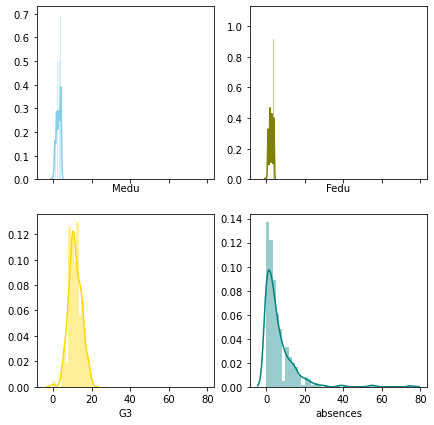

In [20]:
# plot the four variables together.
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( dfgrade["Medu"] , color="skyblue", ax=axes[0, 0])
sns.distplot( dfgrade["Fedu"] , color="olive", ax=axes[0, 1])
sns.distplot( dfgrade["G3"] , color="gold", ax=axes[1, 0])
sns.distplot( dfgrade["absences"] , color="teal", ax=axes[1, 1])

# These plots display that the mothers in the sample have the wider differences in education levels, the father's education
# levels are concentrated more.  The third plot shows that the grades attained by the sample average around 10/11.  The fourth
# plot shows that the majority of students were absent for 10 days or less.


### PLOTTING THE FOUR VARIABLES SEPARATELY

Text(0, 0.5, 'Number of Mothers/Frequency')

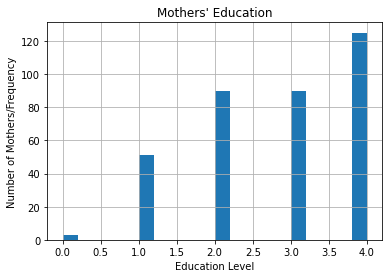

In [21]:
# Creating a histogram to illustrate mothers' educational attainment.

from pandas import DataFrame

Medu = dfgrade.iloc[:,[0]]
Medu.hist(bins = 20)
plt.title("Mothers' Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Mothers/Frequency")




Text(0, 0.5, 'Number of Fathers/Frequency')

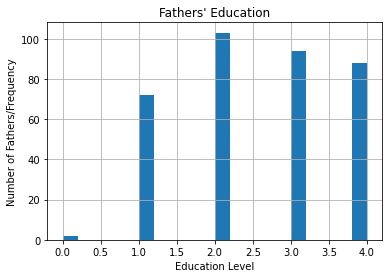

In [22]:
# Creating a histogram to illustrate fathers' educational attainment.
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



Fedu = dfgrade.iloc[:,[1]]
                    
Fedu.hist(bins = 20)
                    
plt.title("Fathers' Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Fathers/Frequency")







Text(0, 0.5, 'Number of Absences/Frequency')

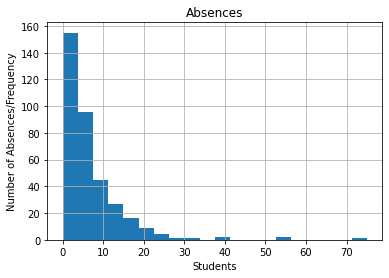

In [23]:
# Creating a histogram to illustrate absenteeism in the simulated student group.
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
absences = dfgrade.iloc[:,[3]]
#print(absences)
absences.hist(bins = 20)
plt.title("Absences")
plt.xlabel("Students")
plt.ylabel("Number of Absences/Frequency")



Text(0, 0.5, 'Number of Students/Frequency')

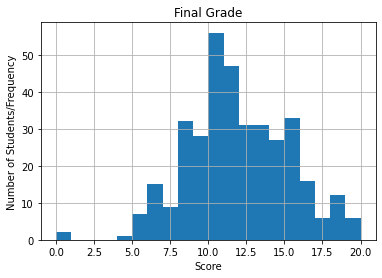

In [24]:
# Creating a histogram to illustrate final year grades (G3).
from pandas import DataFrame

G3 = dfgrade.iloc[:,[6]]
G3.hist(bins = 20)
plt.title("Final Grade")
plt.xlabel("Score")
plt.ylabel("Number of Students/Frequency")



#### Projection
These histograms will be useful to see if the simulated data I create is representative of the original real world
data.  I will compare each with the histograms produced on the simulated data.



### CREATE DATASETS WHICH SIMULATE THE FOUR VARIABLES (MEDU, FEDU, ABSENCES AND G3)- Objective 3

In [ ]:
#### EXTRA SOURCES

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
Useful to check correct syntax.

https://datatofish.com/list-to-dataframe/
I realised I had to change lists to dataframes so I could compare/contrast.

https://stackoverflow.com/users/959876/moldovean
A very handy guide to loc and iloc to isolate a column.

https://scipy-lectures.org/packages/scikit-learn/index.html
I did a lot of research on machine learning when trying to find some way to
make the simulated data similar to the real world data, this site was very informative.

https://www.tutorialspoint.com/numpy/numpy_statistical_functions.html
This site helped me adapt the function I got from the runaway horse source below to my situation.
    
https://github.com/runawayhorse001/statspy/blob/master/statspy/basics.py
This was the most useful source I found and I have been down many disappointing alleyways! It gave
me a defined function that I could apply to my real world data to recreate datasets which had the 
same number of samples, the same mean and standard deviation.  A simulated dataset which shares these in common with
a real world dataset is representative of the real world dataset.

https://www.youtube.com/watch?v=xlD8FIM5biA 

In [25]:
# Creating a dataset to simulate Medu

# Source of function 
# https://github.com/runawayhorse001/statspy/blob/master/statspy/basics.py

import numpy as np
import pandas as pd
from scipy.stats import norm

def rnorm(n, mean=0, sd=1):
    """
    Random generation for the normal distribution with mean 
    equal to mean and standard deviation equation to sd
    same functions as rnorm in r: ``rnorm(n, mean=0, sd=1)``
    :param n: the number of the observations
    :param mean: vector of means
    :param sd: vector of standard deviations
    :return: the vector of the random numbers  
    :author: Wenqiang Feng
    :email:  von198@gmail.com
    """
    return norm.rvs(loc=mean, scale=sd, size=n)


mu = 2.788301
SD = 1.095841
N = 359

simulated_data = rnorm(359, 2.788301, 1.095841)
print(simulated_data)

# This function returns 359 samples with the given mean and standard deviation.



[ 2.83138026  4.5410174   2.10951275  2.58572075  2.59282504  2.88031732
  3.81750705  1.46797251  2.42533357  1.43723143  2.41448093  2.46478566
  3.58757865  4.9863798   4.21435282  1.59552269  3.49853814  2.01430246
  3.22997671  1.20645942  3.13895356  2.86834391  3.67953338  2.76727851
  3.21117264  3.30765128  0.83493618  2.00357242  3.03815748  2.10957282
  2.91373948  2.75917073  3.68780667  1.96263678  4.08852172  3.70327176
  4.27475255  3.1850443   3.29916242  2.25070767  3.65083973  2.93456544
  3.29439199  3.44960925  2.27086751  2.99605904  2.97351031  3.94860979
  2.35294152  3.74207766  3.91788259  3.35694719  2.14623722  1.49385033
  2.1308366   2.59971689  3.32131949  1.54924417  1.02392794  3.38110429
  3.8824439   3.6500001   2.60666641  0.92025617  2.63505246  2.48794464
  1.82785524  2.29289179  3.07148652  1.0379437   2.2546395   1.15226615
  2.18114557  0.91986713  2.0389931   5.31594495  2.66803684  3.50830939
  2.32156037  1.0555406   3.14138079  1.17029764  3

In [26]:
# preparing to plot the simulated Medu dataset.
import numpy as np
a = simulated_data

hist, bins = np.histogram(a, bins = [0,1,2,3,4])
print(hist)
print(bins)

[ 12  66 121 113]
[0 1 2 3 4]


Text(0, 0.5, 'Number of Mothers/Frequency')

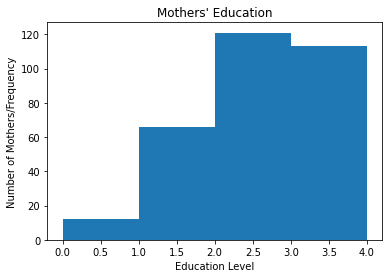

In [27]:
# A histogram to illustrate mothers' simulated education levels
import matplotlib.pyplot as plt
import numpy as np


a = simulated_data
plt.hist(a, bins = [0,1,2,3,4])
plt.title("Mothers' Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Mothers/Frequency")

# this is not completely comparable to the real data above, where most of the sample had achieved 
# 3rd level education (level 4)

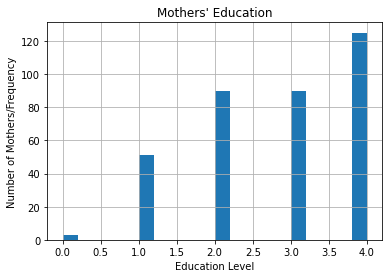

In [28]:
from IPython.display import Image
Image(filename="img/medu.png")

In [29]:
# Creating a dataset to simulate Fedu.

mu =2.540390 
SD =1.084637
N = 359

# This function returns 359 samples with the given mean and standard deviation.

simulated_data1 = rnorm(359,2.540390 , 1.084637)
print(simulated_data1)


[1.02655119 2.72758002 1.87379899 1.7684677  3.37585587 2.06700268
 1.32087309 3.29784416 1.72845401 2.76925539 3.68009683 2.76352653
 1.23368857 3.23770691 1.40637107 1.6924405  3.05988211 2.52722553
 2.28376932 2.33814245 3.08564784 2.23030329 3.55512306 5.67382234
 0.20861226 2.55269854 1.47643845 1.64721571 4.41004734 2.22741627
 0.50351575 3.40858701 4.1391671  1.8144621  2.43650375 3.57481382
 0.68299605 1.77603245 1.47175984 3.23402805 3.92335894 2.6054135
 1.85143937 2.07416075 3.68363976 1.09091599 2.71022186 2.5474041
 2.66162998 3.65494224 2.68473028 3.34117796 3.43619125 3.47920478
 1.39514602 3.8249865  2.72499355 2.13849358 1.84351418 1.29555179
 2.49467125 1.86844773 2.32237155 2.03405341 2.42472129 3.89911957
 3.97797785 1.35047568 3.07457315 2.90223115 2.34300876 4.39335538
 1.44935157 2.23123166 0.4051363  2.58545766 2.8802647  2.15966723
 2.94102175 3.53326239 1.789137   1.21688977 2.65379077 2.722331
 3.93564166 2.27474331 1.27762373 4.00873613 1.72765526 2.54231797

In [30]:
#prepare to plot the dataset of fathers' education/Fedu.

b = simulated_data1
hist, bins = np.histogram(b, bins =[0,1,2,3,4])
print(hist)
print(bins)

[ 21  90 137  90]
[0 1 2 3 4]


Text(0, 0.5, 'Number of Fathers/Frequency')

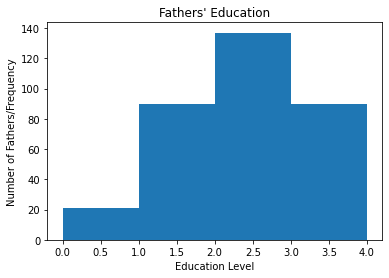

In [31]:
# A histogram to illustrate simulated dataset for fathers' education. 

b = simulated_data1

plt.hist(b, bins = [0, 1, 2, 3, 4])
plt.title("Fathers' Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Fathers/Frequency")

# This plot is closer to the plot from the real dataset.


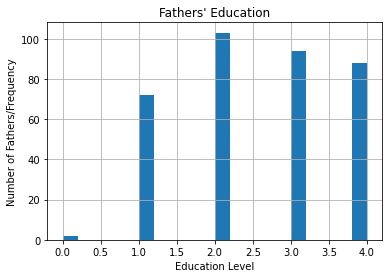

In [32]:
from IPython.display import Image
Image(filename="img/fedu.png")

In [33]:
# Creating a dataset to simulate Absences

mu=6.281337
SD=8.178283
N=359

# This produces a simulated data set but because the standard deviation is so high,
# there are many negative values.  I decided to square all the values then get their
# square roots to have all positive values.

# This function returns 359 samples with the given mean and standard deviation.
simulated_data2 = rnorm(359, 6.281337, 8.178283)
#print(simulated_data2)

# This code squares every element i on the list l.
l = simulated_data2
[i**2 for i in l]




[5.3016721522521015,
 171.6155614506211,
 83.04042178178678,
 156.5626790701767,
 70.14134247557094,
 47.220926220861884,
 177.93138641281294,
 38.18749542083045,
 362.6712803066433,
 0.2173216924832278,
 42.62481278401945,
 81.82835463225912,
 245.0770974584041,
 351.3414705836756,
 149.73551632137404,
 78.58974840639696,
 15.616141610621481,
 100.48578181928964,
 134.2063087027822,
 500.160277953179,
 62.66295835476833,
 115.97450325807702,
 143.5275642056697,
 82.8507183758035,
 4.003614797803583,
 0.7580711392671114,
 0.0032841618106857233,
 52.342260538534106,
 4.431617372682447,
 256.7579525461409,
 42.17105105262869,
 45.541374097220306,
 57.125479461639316,
 10.467181162096967,
 459.05656896261473,
 230.47045307861563,
 62.56740194023683,
 2.5334368464661106,
 299.46972285121177,
 372.0283921761037,
 9.447792907167326,
 119.6564880809715,
 0.6885608604784595,
 20.372736108911848,
 41.81321043975443,
 156.7628434547641,
 371.3756530204344,
 42.36613327940337,
 14.839463541517478

In [34]:
# l is the original simulated dataset created by the function rnorm.  l1 is the dataset created
# by squaring every element of l.
l = simulated_data2
l1 = [i**2 for i in l]

# use the numpy sqrt function to get the square root of each element of l1, call the new list l2.
l2 = np.sqrt(l1)
print(l2)

[ 2.30253603 13.10021227  9.11265174 12.51250091  8.37504283  6.87174841
 13.33909241  6.17960318 19.04393027  0.46617775  6.52876809  9.04590264
 15.65493844 18.74410496 12.23664645  8.86508592  3.95172641 10.02425966
 11.58474465 22.36426341  7.91599383 10.76914589 11.980299    9.102237
  2.0009035   0.87067281  0.05730761  7.23479513  2.1051407  16.02366851
  6.49392416  6.74843494  7.55813995  3.23530233 21.42560545 15.18125334
  7.90995587  1.59167737 17.30519352 19.28803754  3.07372623 10.93876081
  0.82979567  4.51361674  6.46631351 12.52049693 19.27110928  6.5089272
  3.85220243  2.1500966   5.55437579 14.27593617 15.87291897  8.89520063
 13.80770953  4.88546324 13.51621961  3.07639195 15.01502565 19.01844358
 26.19036835  1.01699728  6.77406429  9.54318254  6.21401851  1.1855629
  7.5561916   0.58683274  1.06340513  5.4577661   6.70648295  7.09474373
 10.7530841  12.1333556  11.52544214  6.03809021  2.56011082  8.00713731
 13.75132336 12.27674963  6.61681926  7.2543571  13.158

In [35]:
# Prepare to plot the absence data.

hist, bins = np.histogram(l2)
print(hist)
print(bins)

[80 71 72 60 45 20  5  4  1  1]
[ 0.05730761  3.46299024  6.86867288 10.27435551 13.68003815 17.08572078
 20.49140342 23.89708605 27.30276869 30.70845132 34.11413396]


Text(0, 0.5, 'Number of Absent Days/Frequency')

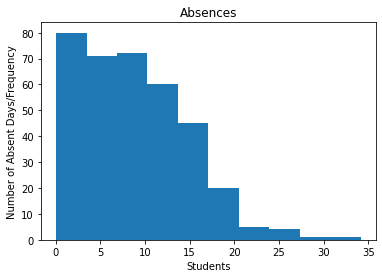

In [36]:
# Creating a histogram to illustrate absenteeism in the simulated student group.


plt.hist(l2)
plt.title("Absences")
plt.xlabel("Students")
plt.ylabel("Number of Absent Days/Frequency")

# This dataset is still not correct and doesn't correlate with the real data.

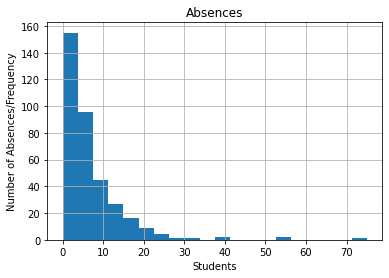

In [37]:
from IPython.display import Image
Image(filename="img/absences.png")

In [38]:
# Creating a dataset to simulate G3

mu = 11.45961
SD = 3.33140
N = 359

simulated_data3 = rnorm(359, 11.45961, 3.33140)
print(simulated_data3)



[13.73736316 10.008511   11.78077937 10.46172103 13.06410528 10.52498132
  8.63334557 11.7929664  16.10985463  5.63307675  9.98098215 11.86199081
 11.85973945 15.94200401  6.39748427 11.0783567   9.56577446 11.05579521
  9.38381792  6.45399206 11.87383117 12.74538111 13.51746543 13.45120643
 14.99823127 14.56151646  8.46610601 10.33197319  7.3601307   6.69181527
  6.96696861 16.98722848 11.74461664  5.86908899 10.24788228  9.97250819
 15.49612542  9.31771268 12.61630722  3.56858659 11.0813589  13.35323567
 15.44218776 20.71920847 11.89123031  9.3631932  11.25516826  6.21162401
 10.77408412 15.20597647  3.81051848 10.17493493  8.95072736 16.49602856
  7.10296348 11.25386848 11.60459281 10.00453926 12.4384601  11.9920351
 12.00752487 10.70595933 16.58061161  5.61103479  6.34389216 11.0279496
  8.22114937 15.4554682  10.36147113 15.16702762 15.83347668 13.36652918
 11.53571017  7.28135741  8.15865093 12.14488794 10.62894727  7.34024858
  9.20817655 10.83909827  5.84328218  9.81176023 11.3

In [39]:
import numpy as np
d = simulated_data3

hist, bins = np.histogram(d, bins = 20 )
print(hist)
print(bins)

[ 1  3  5 11 13 15 29 24 54 49 45 26 18 16 23  8  9  4  4  2]
[ 2.41308837  3.32839438  4.24370038  5.15900639  6.07431239  6.9896184
  7.9049244   8.8202304   9.73553641 10.65084241 11.56614842 12.48145442
 13.39676043 14.31206643 15.22737244 16.14267844 17.05798445 17.97329045
 18.88859646 19.80390246 20.71920847]


Text(0, 0.5, 'Number of Students/Frequency')

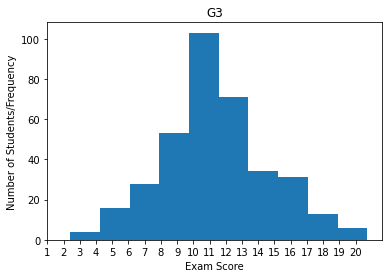

In [40]:
# Creating a histogram to illustrate G3, the final year score in the simulated student group.

import matplotlib.pyplot as plt
import numpy as np


d = simulated_data3
plt.hist(d)
plt.title("G3")
plt.xlabel("Exam Score")
plt.xticks(range(1,21))
plt.ylabel("Number of Students/Frequency")


# this dataset correlates well with the real dataset for student final exam scores, G3.

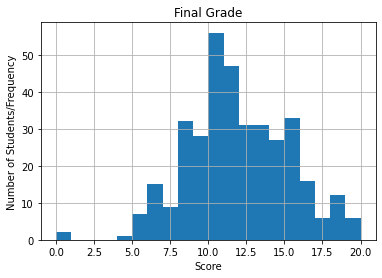

In [41]:
from IPython.display import Image
Image(filename="img/g3.png")